# New Section
Part 2

In [191]:
#importing the required libraries to handle the data
import pandas as pd

In [192]:
#reading the excel file
df=pd.read_excel('/content/tma.xlsx')
df=df.dropna()
df['DurationMonths'] = df['DurationMonths'].apply(lambda x: int(x))

In [193]:
#function to sort values to group later 
dfs = df.sort_values('DurationMonths')
dfs = dfs[['DurationMonths','Age']]
dfs

,DurationMonths,Age
0,0,41
1,0,50
2,4,66
3,5,34
4,7,39
...,...,...
80,88,35
81,93,51
82,103,32
83,110,47


In [194]:
#group duration_months in to 12 each
duration_months = []
cnt = 0
while(cnt<=117):
  duration_months.append(f'{cnt}-{cnt+12}')
  cnt=cnt+13
duration_months

['0-12',
 '13-25',
 '26-38',
 '39-51',
 '52-64',
 '65-77',
 '78-90',
 '91-103',
 '104-116',
 '117-129']

In [195]:
df_ = []
for duration_month in duration_months:
  l , u = duration_month.split('-')
  l , u = int(l) , int(u)
  df_.append(dfs[(dfs['DurationMonths'] >= l) & (dfs['DurationMonths']<=u)])


In [196]:
#check and allocate catergory 
age_ = []
for d in df_:
  age = []
  age.append(len(d[(d['Age']>=30) & (d['Age']<=39)]))
  age.append(len(d[(d['Age']>=40) & (d['Age']<=49)]))
  age.append(len(d[(d['Age']>=50) & (d['Age']<=59)]))
  age.append(len(d[(d['Age']>=60) & (d['Age']<=69)]))
  age.append(len(d[(d['Age']>=70) & (d['Age']<=79)]))
  age_.append(age)


In [197]:
df_n = pd.DataFrame(columns = ['DMR','AR','AR_CNT'])
df_n['DMR'] = ['0-12',
 '0-12',
 '0-12',
 '0-12',
 '0-12',
 '13-25',
 '13-25',
 '13-25',
 '13-25',
 '13-25',
 '26-38',
 '26-38',
 '26-38',
 '26-38',
 '26-38',
 '39-51',
 '39-51',
 '39-51',
 '39-51',
 '39-51',
 '52-64',
 '52-64',
 '52-64',
 '52-64',
 '52-64',
 '65-77',
 '65-77',
 '65-77',
 '65-77',
 '65-77',
 '78-90',
 '78-90',
 '78-90',
 '78-90',
 '78-90',
 '91-103',
 '91-103',
 '91-103',
 '91-103',
 '91-103',
 '104-116',
 '104-116',
 '104-116',
 '104-116',
 '104-116',
 '117-129',
 '117-129',
 '117-129',
 '117-129',
 '117-129',]
df_n['AR'] = ['30-39','40-49','50-59','60-69','70-79']*len(duration_months)
df_n['AR_CNT'] = sum(age_, [])

In [199]:
import seaborn as sns

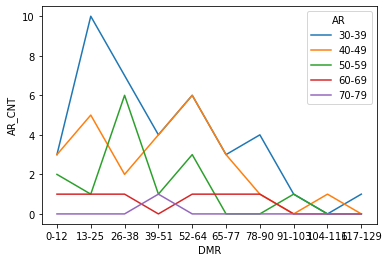

In [200]:
sns.lineplot(x='DMR',y='AR_CNT',hue='AR',ci=None,data=df_n)

In [241]:
##reading the excel file
df1=pd.read_excel('/content/tma.xlsx')

In [242]:
#table headers
df1 = df1[['Unit','Age','PerformanceScore']]

In [243]:
df1['Age'] = df1['Age'].mask(lambda x : (x>=30) & (x<=39),0)
df1['Age'] = df1['Age'].mask(lambda x : (x>=40) & (x<=49),1)
df1['Age'] = df1['Age'].mask(lambda x : (x>=50) & (x<=59),2)
df1['Age'] = df1['Age'].mask(lambda x : (x>=60) & (x<=69),3)
df1['Age'] = df1['Age'].mask(lambda x : (x>=70) & (x<=79),4)

df1=df1.sort_values(by = ['Age','Unit','PerformanceScore']).reset_index()


,index,Unit,Age,PerformanceScore
0,88,Admin,0,Meet
1,93,Admin,0,Meet
2,109,Admin,0,Meet
3,190,Admin,0,Meet
4,211,Admin,0,Meet
...,...,...,...,...
245,205,Manufacturing,3,Meet
246,101,Sales,3,Meet
247,191,IT,4,Meet
248,47,Manufacturing,4,Meet


In [344]:
#function to allocate the age into the "Age" containers
s = pd.DataFrame(df1[['Age','Unit','PerformanceScore']].value_counts()).sort_values('Age').reset_index()
for index,age in enumerate(s['Age']):
  if age == 0:
    s['Age'][index] = '30-39'
  elif age == 1:
    s['Age'][index] = '40-49'    
  elif age == 2:
    s['Age'][index] = '50-59'     
  elif age == 3:
    s['Age'][index] = '60-69'    
  elif age == 4:
    s['Age'][index] = '70-79'    
s

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Age,Unit,PerformanceScore,0
0,30-39,Manufacturing,Meet,54
1,30-39,Engineering,Exceed,1
2,30-39,Sales,Exceed,1
3,30-39,Sales,To Improve,1
4,30-39,Engineering,To Improve,1
5,30-39,Manufacturing,PIP,2
6,30-39,IT,Exceed,3
7,30-39,Engineering,Meet,4
8,30-39,Manufacturing,To Improve,6
9,30-39,Admin,Meet,6


In [345]:
#importing the required libraries to handle the data
import seaborn as sns


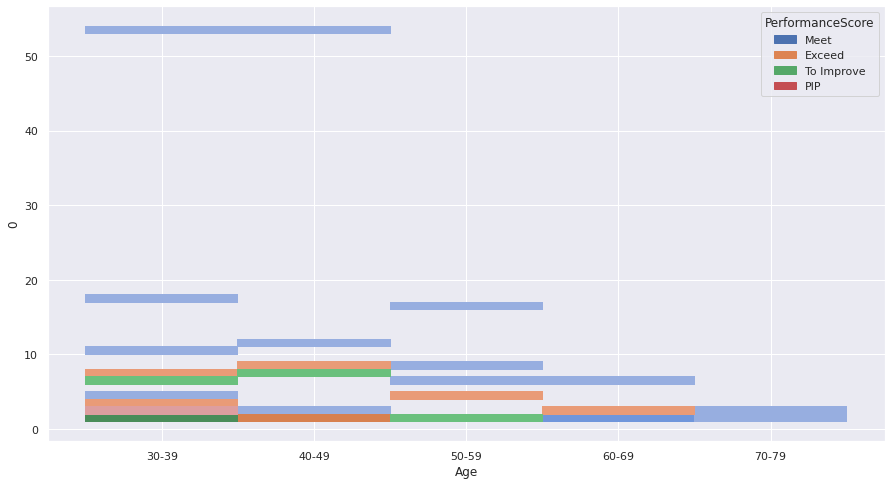

In [349]:
#plot graph
sns.set(rc = {'figure.figsize':(15,8)})
sns.histplot(data=s, x="Age", hue="PerformanceScore", y = 0,multiple="stack",binwidth=1)

In [153]:
# df_ = []
# age_groups = ['30-39','40-49','50-59','60-69','70-79']
# for age in age_groups:
#   l , u = age.split('-')
#   l , u = int(l) , int(u)
#   df_.append(df1[(df1['Age'] >= l) & (df1['Age']<=u)])
# df_

[              Unit  Age PerformanceScore
 3               IT   34             Meet
 4    Manufacturing   39             Meet
 7    Manufacturing   38             Meet
 9    Manufacturing   37             Meet
 12   Manufacturing   35             Meet
 ..             ...  ...              ...
 236             IT   36             Meet
 238             IT   38             Meet
 240             IT   36             Meet
 247             IT   34             Meet
 249  Manufacturing   35             Meet
 
 [114 rows x 3 columns],               Unit  Age PerformanceScore
 0    Manufacturing   41             Meet
 6    Manufacturing   43             Meet
 8    Manufacturing   43             Meet
 18   Manufacturing   45       To Improve
 19   Manufacturing   49             Meet
 ..             ...  ...              ...
 241  Manufacturing   44             Meet
 243  Manufacturing   42             Meet
 244  Manufacturing   43             Meet
 245  Manufacturing   41           Exceed
 246    

In [156]:
df_n = pd.DataFrame(columns = ['AgeGroup','Unit','PerformanceScore'])
for i in df_:
  df_n['AgeGroup'] = '30-39'

,AgeGroup,Unit,PerformanceScore
